<a href="https://colab.research.google.com/github/PierreKimbanziR/pneumonia-challenge/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import keras
from keras.models import Model
from keras.layers import Dense
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

In [75]:
t_data = ImageDataGenerator()
train_data = t_data.flow_from_directory(directory="/content/drive/MyDrive/pneumonia_challenge/chest_xray/train",target_size=(224,224))
v_data = ImageDataGenerator()
val_data = v_data.flow_from_directory(directory="/content/drive/MyDrive/pneumonia_challenge/chest_xray/val", target_size=(224,224))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [76]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [77]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [78]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

In [79]:
X= vggmodel.layers[-2].output
predictions = Dense(2, activation="softmax")(X)
model_final = Model(inputs = vggmodel.input, outputs = predictions)

In [80]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

In [81]:
model_final.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [82]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("/content/drive/MyDrive/pneumonia_challenge/vgg16_1.h5", monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='loss', min_delta=0, patience=25, verbose=1, mode='auto')
model = model_final.fit_generator(generator= train_data, steps_per_epoch= 2, epochs= 100, validation_data= val_data, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("/content/drive/MyDrive/pneumonia_challenge/vgg16_1.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 0.7025 - accuracy: 0.5312
Epoch 00001: loss improved from inf to 0.70247, saving model to /content/drive/MyDrive/pneumonia_challenge/vgg16_1.h5
2/2 [==============================] - ETA: 0s - loss: 0.5623 - accuracy: 0.6875
Epoch 00001: loss improved from 0.70247 to 0.56228, saving model to /content/drive/MyDrive/pneumonia_challenge/vgg16_1.h5
2/2 [==============================] - 36s 34s/step - loss: 0.5623 - accuracy: 0.6875 - val_loss: 1.0297 - val_accuracy: 0.5000
Epoch 2/100
1/2 [==============>...............] - ETA: 1s - loss: 0.5717 - accuracy: 0.8125
Epoch 00002: loss did not improve from 0.56228
2/2 [==============================] - ETA: 0s - loss: 0.7241 - accuracy: 0.7500
Epoch 00002: loss did not improve from 0.56228
2/2 [==============================] - 3s 2s/step - loss: 0.7241 - accuracy: 0.7500 - val_loss: 0.7527 - val_accuracy: 0.5625
Epoch 3/100
1/2 [==============>...............] - ETA: 1s - los

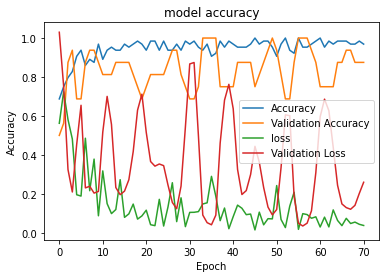

<Figure size 720x720 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt
plt.plot(model.history["accuracy"])
plt.plot(model.history['val_accuracy'])
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()